$$
\mathbf{v}\lambda = \mathbf{A}\mathbf{v}
$$

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from numpy.typing import ArrayLike
plt.style.use("ggplot")

In [38]:
A = np.random.uniform(size=(2, 2), low=-10, high=10)

In [39]:
A

array([[-2.9535357 ,  8.90164842],
       [ 6.47036459, -4.59417555]])

In [40]:
def generate_vector(angle: float) -> ArrayLike:
    vect = np.array([np.cos(angle), np.sin(angle)])
    return vect

In [41]:
v = generate_vector(0)

In [42]:
v

array([1., 0.])

In [43]:
y = A @ v

In [44]:
y

array([-2.9535357 ,  6.47036459])

[(-1.0, 1.0), (-1.0, 1.0)]

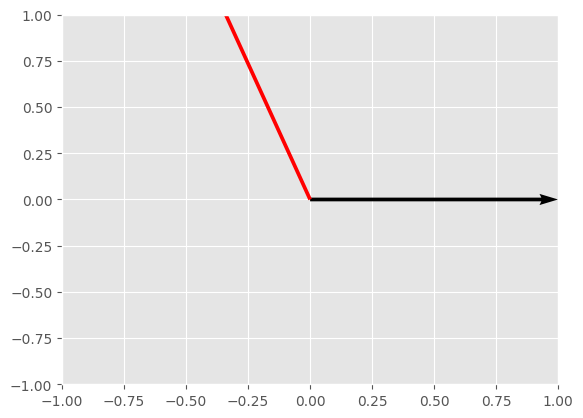

In [45]:
fig, ax = plt.subplots()
ax.quiver(0, 0, v[0], v[1], color="k", scale=2, label="$\vec{v}$")
ax.quiver(0, 0, y[0], y[1], color="r", scale=2, label="$\vec{y}$")
ax.set(xlim=[-1, 1], ylim=[-1, 1])

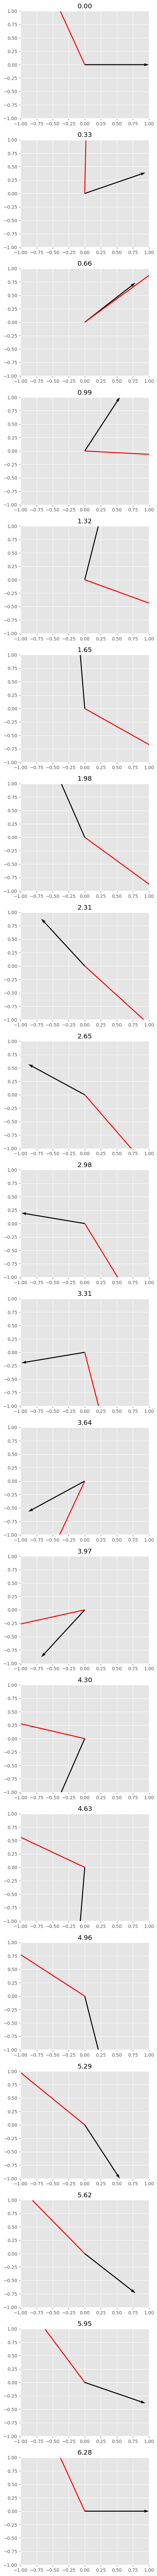

In [46]:
angles = np.linspace(0, 2 * np.pi, 20)

fig, axes = plt.subplots(20, 1, figsize=(5, 100))
for i in range(angles.size):
    ax = axes[i]
    v = generate_vector(angles[i])
    y = A @ v
    ax.quiver(0, 0, v[0], v[1], color="k", scale=2, label="$\vec{v}$")
    ax.quiver(0, 0, y[0], y[1], color="r", scale=2, label="$\vec{y}$")
    ax.set(xlim=[-1, 1], ylim=[-1, 1], title=f"{angles[i]:.2f}")

In [47]:
A

array([[-2.9535357 ,  8.90164842],
       [ 6.47036459, -4.59417555]])

In [62]:
vals, vects = np.linalg.eig(A)

In [63]:
vals

array([  3.8596125 , -11.40732374])

In [64]:
vects

array([[ 0.79409926, -0.72511242],
       [ 0.60778809,  0.68863051]])

In [65]:
A

array([[-2.9535357 ,  8.90164842],
       [ 6.47036459, -4.59417555]])

In [66]:
A @ vects

array([[ 3.06491542,  8.27159211],
       [ 2.34582652, -7.85543117]])

In [67]:
vects

array([[ 0.79409926, -0.72511242],
       [ 0.60778809,  0.68863051]])

In [68]:
vals

array([  3.8596125 , -11.40732374])

In [69]:
A @ vects[:, [0]]

array([[3.06491542],
       [2.34582652]])

In [70]:
vects[:, [0]] * vals[0]

array([[3.06491542],
       [2.34582652]])

[(-1.0, 1.0), (-1.0, 1.0)]

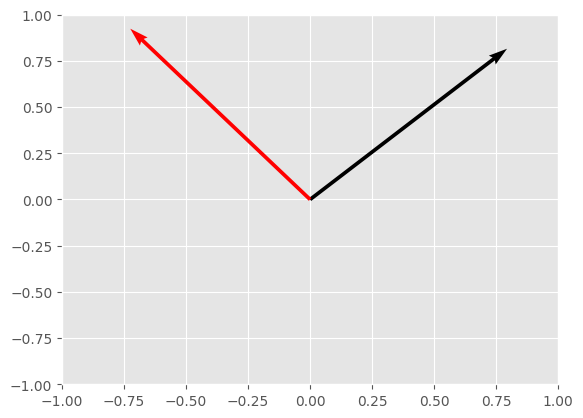

In [73]:
fig, ax = plt.subplots()
ax.quiver(0, 0, vects[0, 0], vects[1, 0], color="k", scale=2, label="$\vec{v}$")
ax.quiver(0, 0, vects[0, 1], vects[1, 1], color="r", scale=2, label="$\vec{y}$")
ax.set(xlim=[-1, 1], ylim=[-1, 1])

In [100]:
cov = np.random.normal(size=(2, 2))
cov = cov @ cov.T

In [101]:
cov

array([[2.14804455, 1.56640559],
       [1.56640559, 1.60429937]])

In [102]:
dist = stats.multivariate_normal(
    mean = np.zeros((2, )),
    cov = cov
)

In [103]:
X = dist.rvs(size=1000)

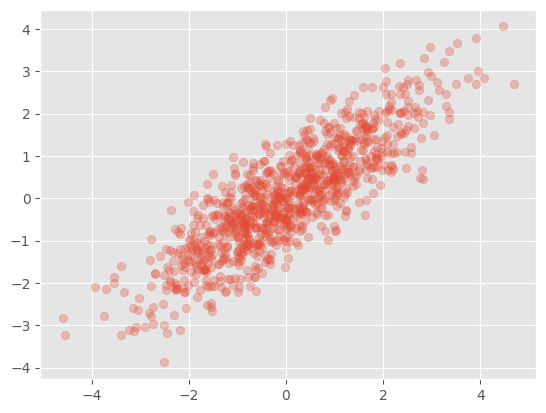

In [104]:
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], alpha=0.3)

In [105]:
cov_sample = np.cov(X.T)

In [106]:
cov_sample

array([[2.06903197, 1.54328908],
       [1.54328908, 1.59156092]])

In [107]:
vals, vects = np.linalg.eig(cov_sample)

In [108]:
vals

array([3.39194168, 0.26865121])

In [109]:
vects

array([[ 0.7592346 , -0.65081704],
       [ 0.65081704,  0.7592346 ]])

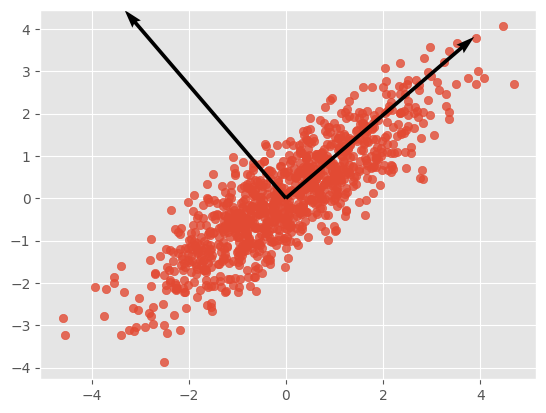

In [110]:
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], alpha=0.8)
ax.quiver(0, 0, vects[0, 0], vects[1, 0], color="k", scale=2)
ax.quiver(0, 0, vects[0, 1], vects[1, 1], color="k", scale=2)

In [111]:
vals

array([3.39194168, 0.26865121])

In [112]:
vects[:, 0]

array([0.7592346 , 0.65081704])

In [113]:
X_trans = X @ vects

In [114]:
X_trans.shape

(1000, 2)

[(-6.0, 6.0), (-6.0, 6.0)]

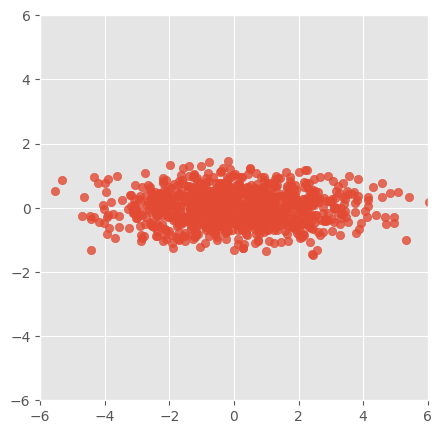

In [116]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(X_trans[:, 0], X_trans[:, 1], alpha=0.8)
ax.set(xlim=[-6, 6], ylim=[-6, 6])